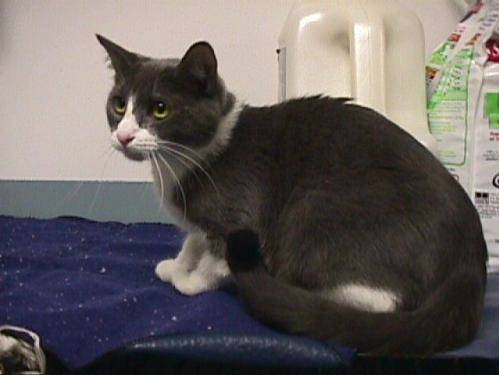

In [2]:
from IPython.display import Image
Image(filename =  'dataset_treino/cats/cat.4.jpg')

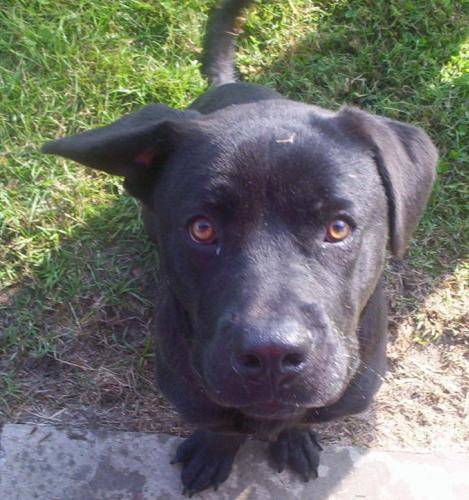

In [3]:
Image(filename = 'dataset_treino/dogs/dog.8.jpg')

In [4]:
import tensorflow as tf
print("Versão do tensor flow:", tf.__version__)

Versão do tensor flow: 2.5.0


In [5]:
import keras

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [7]:
# Inicializando a rede neural convolucional
classifier = Sequential()

In [8]:
# Passo 1 - Primeira camada da convolução
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))

In [9]:
# Passo 2 - Pooling - reduzir o tamanho do mapa de features
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
# Adicionando a segunda camada de convolução
classifier.add(Conv2D(32, (3, 3), activation='relu'))

In [11]:
# Mais uma camada de pooling na saida da camada de convolução anterior
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
# Passo 3 - Flattening - "Achatamento" - Converter a aestrutura de dados 2D em um vetor (1D)
classifier.add(Flatten())

In [13]:
# Passo 4 - Full connection - conectar todas as camadas
# Usando a função retificadora relu
# Usando uma função de ativação sigmóide para obter as probabilidade de cada imagem conter um cachorro ou gato

classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

In [14]:
# Compilando a rede

# Para compialr a rede usaremos o otimizador adam -  baseado em gradiente de funções objetivas estocásticas
# Utilizaremos a entropia crizada pois ela funciona bem com funções sigmóides
# A nossa métrica será a acurácia

classifier.compile(optimizer= "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
# Pré processamento dos dados usando a função imageDataGeneratio() para ajustar:
# 1) escala e zoom das imagens de treino
# 2) escala das imgens de validação


# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255) 


In [16]:
# Pré-processamento das imagens de treino e validação
# o tratamento aplicado aos dados de validação deve ser o mesmo tratamento aplicado aos dados de treino.
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [17]:
# Executando o treinamento (esse processo pode levar bastante tempo dependendo PC)
classifier.fit(training_set,
            steps_per_epoch = 8000,
            epochs = 5,
            validation_data = validation_set,
            validation_steps = 2000)

Epoch 1/5
8000/8000 [==============================] - 121s 14ms/step - loss: 0.6322 - accuracy: 0.6340


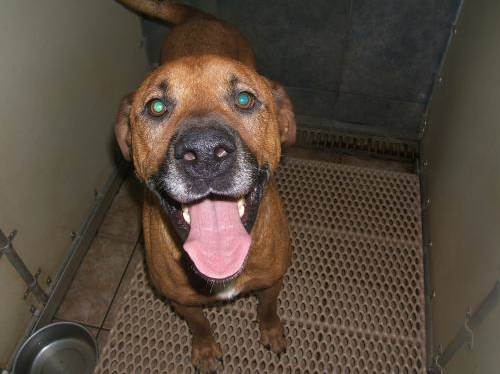

In [18]:
import numpy as np
from keras.preprocessing import image

# carrega a imagem que queremos prever se é cachorro ou gato
test_image = image.load_img('dataset_teste/2820.jpg', target_size = (64, 64))
# converter a imagem em um array e expandiar a dimensão
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# apresentamos a imagem ao classificador treinado
result = classifier.predict(test_image)
training_set.class_indices

# verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro
if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/2820.jpg')

In [19]:
prediction

'Cachorro'

In [22]:
classifier.save('dogandcat.py')

INFO:tensorflow:Assets written to: dogandcat.py\assets
